# PyTorch Computer Vision

## 0. Computer Vision

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets`- get datasets and data loading functions for computer vision
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - base dataset class for PyTorch
* `torch.utils.data.DataLoader` - creates a Python iterable over a dataset

In [12]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check version
print(torch.__version__)
print(torchvision.__version__)

2.2.2
0.17.2


## 1. Getting a dataset

The dataset we will be using is FashionMNIST from torchvision.datasets

In [4]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data", # where to download data to
    train=True, # do we want the training dataset
    download=True, # do we want to download yes/no
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data
    # ToTensor documentation: https://pytorch.org/vision/stable//generated/torchvision.transforms.ToTensor.html
    target_transform=None # how do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [6]:
# First training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_to_idx = train_data.class_to_idx
class_to_idx # the labels and their corresponding indexes

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
train_data.targets # all the labels

tensor([9, 0, 0,  ..., 3, 0, 5])

In [10]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color channels, height, width]
Image label: Ankle boot


## 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

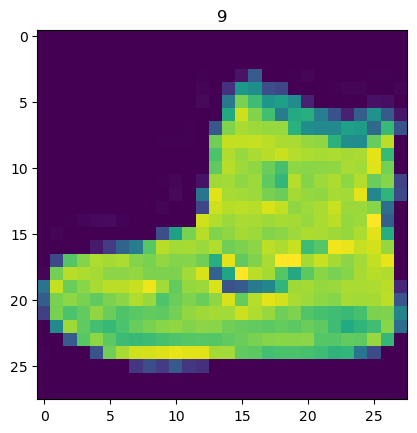

In [11]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # removes the singular dimension (color channel) so that the shape matches the expected shape
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

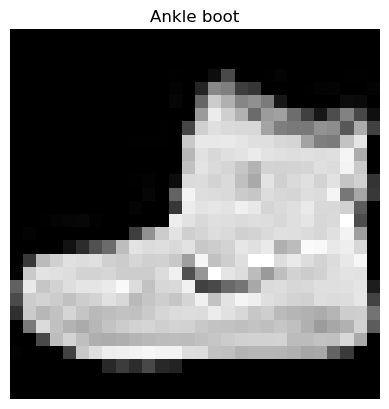

In [12]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

37542


46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572


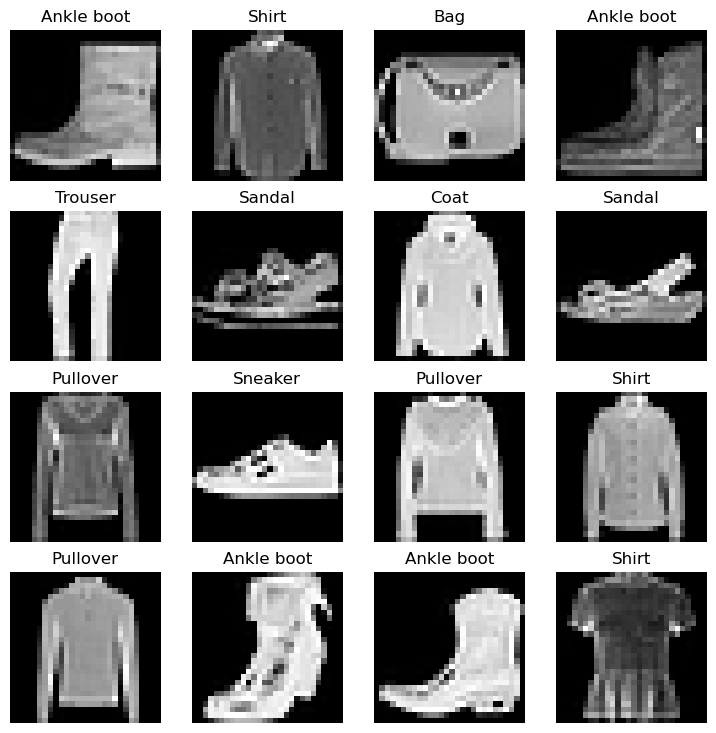

In [13]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    print(random_idx) # pseudorandom with the seed/random without it
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)


## 2. Prepare DataLoader

Right now, the data is in the form of PyTorch Datasets

DataLoader turns the dataset into a Python iterable

More specifically, we want to turn our data into batches (or mini-batches)

Why?

1. It is more computationally efficient. The computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives the neural network more chances to update its gradients per epoch. This means the model will update its internal state (its weights) after every 32 images thanks to the optimizer rather than after every 60000 images.  

In [14]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True) # we shuffle to not keep the order since we are interested in recognizing patterns, not preserving the order of the items. We do not want the model to learn order. Improves model generalization

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False) # for testing purposes its easier to maintain order since it is not shuffled each time

In [15]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x1439adb10>, <torch.utils.data.dataloader.DataLoader object at 0x1436b79d0>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [16]:
# What is inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader)) # we get the images and labels. We turn the batches into an iterable, and then fetch the next batch
train_features_batch.shape, train_labels_batch.shape
# the output is [BS,C,H,W] (Batch Size, Color Channels, Height, Width)


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


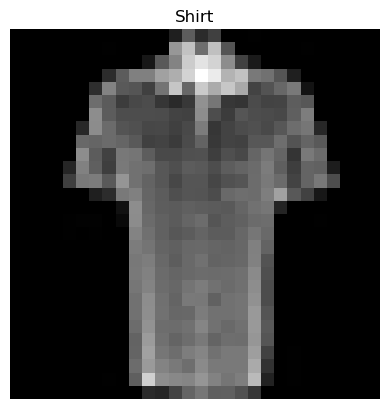

In [17]:
# Show a sample
torch.manual_seed(42) # pseudo random with the seed, random without it
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a Baseline model

When starting to build a series of machine learning modelling experiments, it is best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments. 

In [18]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0] # it is a tensor

# Flatten the sample
output = flatten_model(x) # performs the forward pass
# the purpose is to condense information into a single vector space

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]") 
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [19]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
    def forward(self, x): # our model takes an input (a batch) and passed it through the layers
        return self.layer_stack(x)

In [20]:
torch.manual_seed(42)

# Set up model with input parameters

model_0 = FashionMNISTModelV0(
    input_shape= 784, # this is 28 x 28 which is the height * width of the images
    hidden_units=10, # how many units in a hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we are working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we are working on a classification problem, lets use accuracy as our evaluation metric

In [22]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download...")
else:
    print("Downloading helper functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper_functions.py already exists, skipping download...


In [23]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments

Machine Learning is very experimental.

Two of the main things you will often want to track are:
1. Model's performance (loss and accuracy values, etc)
2. How fast it runs

In [24]:
from timeit import default_timer as timer 
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """Prints difference between start and end time."""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out what is happening
5. Time it all

In [25]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs 
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")

    # Training
    train_loss = 0

    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader): # features are X and labels are y
        model_0.train()

        # Forward pass
        y_pred = model_0(X)

        # Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss

        # Optimizer zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Optimizer (by placing it here, our model gets - hopefully - better every batch not epoch)
        optimizer.step()

        # Printing
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader) # we average out the accumulated train loss by the number of batches

    # Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():

        for X_test, y_test in test_dataloader:
            # Forward pass
            test_pred = model_0(X_test) # these outputs are logits

            # Calculate loss 
            test_loss += loss_fn(test_pred, y_test)

            # Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1)) # the argmax finds the logit value with the highest index and returns the prediction label, allowing labels to be compared with labels

        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)

    # Printing
    print(f"\nTrain loss: {train_loss:.4f}, | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))
        

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904, | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763, | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550, | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 10.441 seconds


## 4. Make predictions and get Model 0 results

In [26]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    
    """Returns a dictionary containing the results of the model predicting on data_loader"""

    loss, acc = 0, 0
    model.eval()

    with torch.inference_mode():

        for X, y in tqdm(data_loader):
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred = y_pred.argmax(dim=1)) # convert from logits to labels
            
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return { "model_name": model.__class__.__name__,
             "model_loss": loss.item(),
             "model_acc": acc }

# Calculate model 0 results on test dataset
model_0_results = eval_model(model = model_0,
                            data_loader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn=accuracy_fn)

model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic code (for using GPU if there is one)

In [27]:
torch.cuda.is_available()

False

In [15]:
# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Model 1: Building a better model with non-linearity

In [29]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into a single vector
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [30]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # this is the output of the flatten after our 28*28 image goes in
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) # send to the GPU if it is available

next(model_1.parameters()).device

device(type='cpu')

### 6.1 Setup loss, optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measures how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), # tries to update our model's paramters to reduce the loss
                            lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops

Function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [32]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    
    """Performs a training with model trying to learn on data_loader"""
    train_loss, train_acc = 0, 0

    # Put model into training mode
    model.train()

    for batch, (X, y) in enumerate(data_loader):
        # Put data on target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass (outputs the raw logits from the model)
        y_pred = model(X)

        # 2. Calculate loss and accuracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # transforms from logits to prediction labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step (update the model's parameters once *per batch*)
        optimizer.step()

    # Divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%]\n")



In [33]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device): # no need for optimizer since we are only evaluating, not optimizing
    
    """Performs a testing loop step on model going over data_loader"""
    test_loss, test_acc = 0, 0

    # Put model in eval mode
    model.eval()

    # Turn on inference mode context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send the data to the target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate the loss/acc
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1)) # transforms from logits to prediction labels
            
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as Timer
train_time_start_on_cpu_model_1 = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------------")
    train_step(model = model_1,
               data_loader=train_dataloader,
               loss_fn = loss_fn,m
               optimizer = optimizer,
               accuracy_fn=accuracy_fn,
               device=device)

    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end_on_cpu_model_1 = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu_model_1,
                                            end=train_time_end_on_cpu_model_1, 
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------------
Train loss: 1.09199 | Train acc: 61.34%]

Test loss: 0.95636 | Test acc: 65.00%

Epoch: 1
--------------
Train loss: 0.78101 | Train acc: 71.93%]

Test loss: 0.72227 | Test acc: 73.91%

Epoch: 2
--------------
Train loss: 0.67027 | Train acc: 75.94%]

Test loss: 0.68500 | Test acc: 75.02%

Train time on cpu: 10.659 seconds


**Note:** Sometimes, depending on your data/hardware you might find that youre model trains faster on CPU than GPU.

Why is this?

1. It could be that the overhead for copying data/model to and from the GPT outweighs the compute benefits offered by the GPU. 
2. The hardware you're using has a better CPU in terms of compute capability than the GPU. 

Here is a useful article tackling this: https://horace.io/brrr_intro.html

In [35]:
total_train_time_model_0

10.440676874997735

In [36]:
total_train_time_model_1

10.659037917001115

In [37]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
    
    """Returns a dictionary containing the results of the model predicting on data_loader"""

    loss, acc = 0, 0
    model.eval()

    with torch.inference_mode():

        for X, y in tqdm(data_loader):

            # Device agnostic code
            X, y = X.to(device), y.to(device)
            
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred = y_pred.argmax(dim=1)) # convert from logits to labels
            
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return { "model_name": model.__class__.__name__,
             "model_loss": loss.item(),
             "model_acc": acc }

In [38]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [39]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

Useful website to explain CNNs, and the model of the CNN we use below: https://poloclub.github.io/cnn-explainer/

In [40]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):

    """
    Model architecture that replicates the TinyVGG
    Model from CNN explainer website
    """
    # As we go through the different blocks and layers of the CNN, our shape becomes smaller and smaller as each layer makes a compressed representation and finds generalizable patterns
    # In this CNN, the layers of the first block are feature extractors (try to learn the patterns that best describe the data) while the second block are mainly classifiers 
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            # Create a conv layer. The hyperparameters (values we set ourselves) are explained more thoroughly in the link above
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # the dimensions of the input sliding. Smaller values lead to more information and deeper architectures. It is really a tuple (3 means 3x3)
                      stride=1, # how many pixels we shift/skip each time. The higher the stride, the more compressed the output is
                      padding=1), # the dimensions of the buffer between the data and the borders. Useful to play around if the kernel has relevant information to analyze on the edges
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)      
        )
        self.classifier = nn.Sequential( # output layer
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # the 7*7 comes from analyzing shapes of the output of the other two blocks with the expected input here (throws an error and then one must find the pattern). This can be derived mathematically as well but easier by analyzing this way.
                      out_features=output_shape)
        )

    def forward(self, x): # adding the prints also helps debug if there is an error in a certain block/layer
        x = self.conv_block_1(x)
        # print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape of classifier: {x.shape}")
        return x


In [41]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,# TinyVGG has 3 since they use rgb (colored images) while our dataset is black and white (1 color channel)
                              hidden_units=10,
                              output_shape=len(class_names)
                            ).to(device)

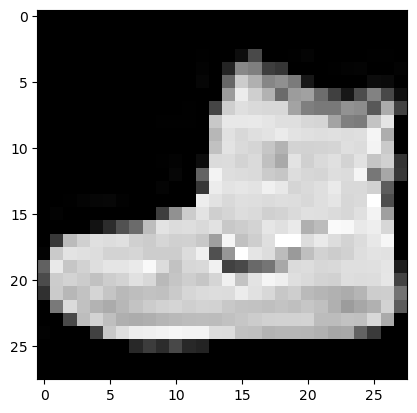

In [42]:
plt.imshow(image.squeeze(), cmap="gray")

In [43]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [44]:
# Pass image through model
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

In [45]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [46]:
model_2.state_dict()
# Just to see that in our CNN we are also full of random numbers

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [47]:
torch.manual_seed(42)
# Create a single Conv2d layer
conv_layer = nn.Conv2d(in_channels=3, # equivalent to our color channels stated above
                       out_channels=10,# equivalent to our hidden units
                        kernel_size=3,
                        stride=1,
                        padding=1)

# play around with the hyperparameters to see how it affects the bottom shape

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0)) # the 4 parameters are batch size, color channels, height, and width
conv_output.shape

torch.Size([1, 10, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d()`

Link to documentation: https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

Essentially, this layer analyzes a certain grid of pixels based on the kernel size. From there, it outputs the max value of the grid to highlight the most important features. This leads to a compression of most relevant features. One way of seeing this is in a compressed image with the most prominent images. From there, the stride affects the intervals upon which such analysis is performed. 

In [48]:
test_image.shape

torch.Size([3, 64, 64])

In [49]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimensions: {test_image.unsqueeze(0).shape}")

# create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimensions: torch.Size([1, 3, 64, 64])
Shape after going through conv layer(): torch.Size([1, 10, 64, 64])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 32, 32])


In [50]:
torch.manual_seed(42)

# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"\nRandom tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")



Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for `model_2`

In [51]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing `model_2` using our training and test functions

In [52]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time. This is where running between a cpu and gpu has time differences.
from timeit import default_timer as timer 
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                       end=train_time_end_model_2,
                                       device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.59365 | Train acc: 78.46%]

Test loss: 0.40805 | Test acc: 85.49%

Epoch: 1
------
Train loss: 0.36538 | Train acc: 86.93%]

Test loss: 0.35773 | Test acc: 86.98%

Epoch: 2
------
Train loss: 0.32685 | Train acc: 88.20%]

Test loss: 0.32159 | Test acc: 88.33%

Train time on cpu: 133.706 seconds


In [53]:
# Get model 2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader, 
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3215923011302948,
 'model_acc': 88.32867412140575}

## 8. Compare model results and training time

In [54]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, # linear model
                                model_1_results, # non-linear model
                                model_2_results]) # cnn model

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.321592,88.328674


In [55]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,10.440677
1,FashionMNISTModelV1,0.685001,75.019968,10.659038
2,FashionMNISTModelV2,0.321592,88.328674,133.706489


Text(0, 0.5, 'model')

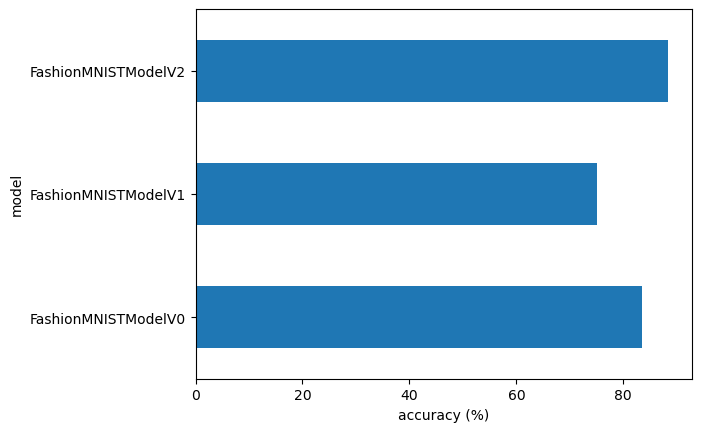

In [56]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with the best model

In [57]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [90]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9): # randomly sampling 
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

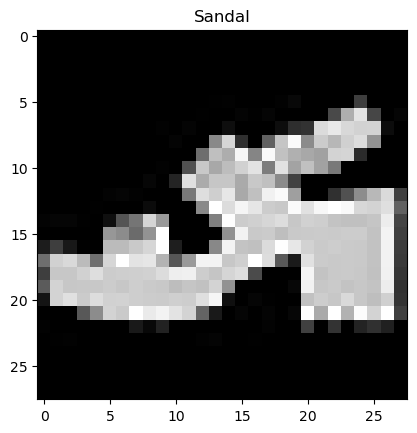

In [91]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [92]:
# Make predictions 
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[7.5148e-08, 1.4409e-08, 4.8597e-08, 7.8190e-07, 2.0335e-08, 9.9987e-01,
         1.0112e-06, 5.9989e-06, 1.0552e-05, 1.0761e-04],
        [5.5547e-02, 6.2846e-01, 5.3199e-04, 1.7810e-01, 3.9578e-02, 1.4964e-04,
         9.6469e-02, 5.6462e-04, 5.1386e-04, 8.4406e-05]])

In [93]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1) # we get labels by picking the highest since this is the highest probability that a sample belongs to a given label/class
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

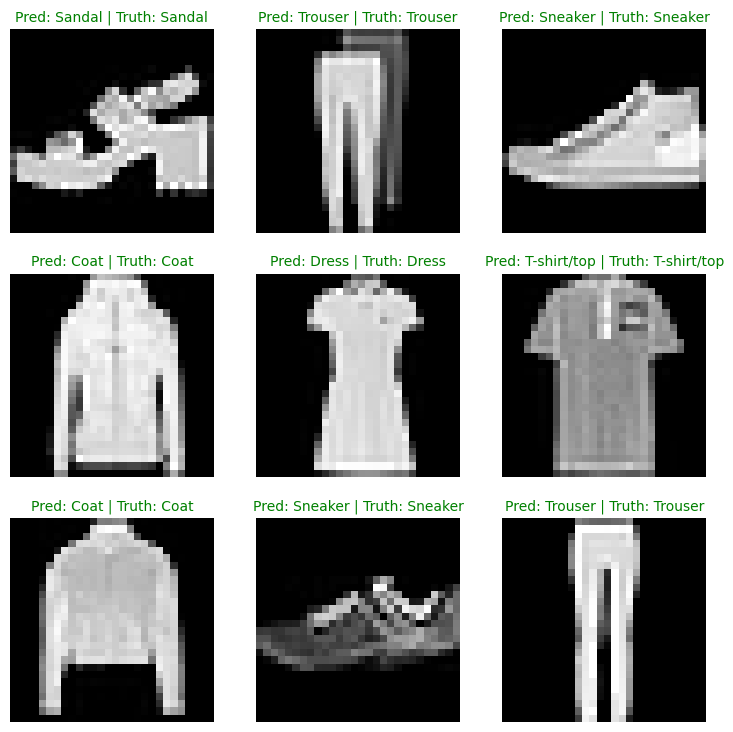

In [94]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the prediction in text form, not number form
    pred_label = class_names[pred_classes[i]]

    # Truth label in text form
    truth_label = class_names[test_labels[i]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g") # green title if prediction is true
    else:
        plt.title(title_text, fontsize=10, c="r")  # red title if prediction is wrong

    plt.axis(False)

## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating classification models visually: https://lightning.ai/docs/torchmetrics/stable/classification/confusion_matrix.html

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mixtend.plotting.plot_confusion_matrix()` - https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [96]:
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        # Send the data and targets to target device
        X, y = X.to(device), y.to(device)
        # Forward pass
        y_logit = model_2(X)
        # Turns predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        # Put prediction on CPU for evaluation
        y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds) # concatenates and turns a list of tensors into a single tensor
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [97]:
len(y_pred_tensor)

10000

In [100]:
# See if required packages are installed and if not, install them
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split("."[1] >= 19)), "mlxtend version should be 0.19 or higher"
except:
    !pip install torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxetnd version: {mlxtend.__version__}")
    

mlxtend version: 0.23.1
mlxetnd version: 0.23.1


In [101]:
mlxtend.__version__

'0.23.1'

In [102]:
y_pred_tensor

tensor([9, 2, 1,  ..., 0, 1, 8])

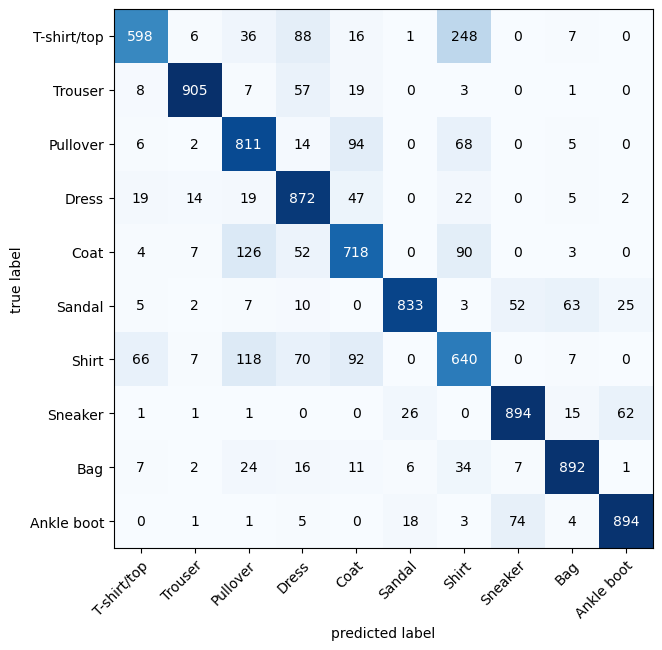

In [108]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# confmat_tensor

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names = class_names,
    figsize=(10, 7)
)

# 11. Save and load best performing model

In [109]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("modles")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "03_PyTorch_Computer_Vision_Model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: modles/03_PyTorch_Computer_Vision_Model.pth


In [110]:
image_shape = [1, 28, 28]

In [111]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [112]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3215923011302948,
 'model_acc': 88.32867412140575}

In [114]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3215923011302948,
 'model_acc': 88.32867412140575}

In [115]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02) # this is the tolerance level regarding up to how many decimal points the data must match

tensor(True)

## 12. Integrating MNIST dataset

In [18]:
import torchvision
from torchvision import datasets
from torchvision import transforms

# Get the MNIST train dataset
train_data = datasets.MNIST(root="data",
                            train=True,
                            download=True,
                            transform=transforms.ToTensor())

# Get the MNIST test dataset
test_data = datasets.MNIST(root="data",
                           train=False,
                           download=True,
                           transform=transforms.ToTensor())

train_data, test_data

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1002)>



100%|██████████| 9912422/9912422 [00:01<00:00, 9435155.60it/s] 


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1002)>



100%|██████████| 28881/28881 [00:00<00:00, 596698.16it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1002)>



100%|██████████| 1648877/1648877 [00:00<00:00, 2226056.21it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1002)>



100%|██████████| 4542/4542 [00:00<00:00, 202469.19it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [19]:
len(train_data), len(test_data)

(60000, 10000)

In [20]:
img = train_data[0][0]
label = train_data[0][1]
print(f"Image:\n{img}")
print(f"Label:\n{label}")

Image:
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 

In [21]:
# Check out the shapes of our data
print(f"Image shape: {img.shape} -> [color channels, height, width] (Color channel, Height, Width)")
print(f"Label: {label} -> no shape, due to being integer")

Image shape: torch.Size([1, 28, 28]) -> [color channels, height, width] (Color channel, Height, Width)
Label: 5 -> no shape, due to being integer


In [22]:
# Get the class names from the dataset
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


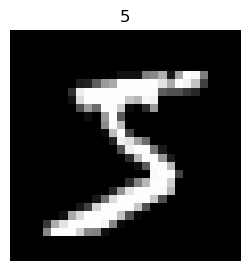

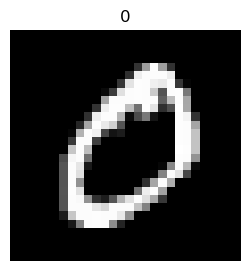

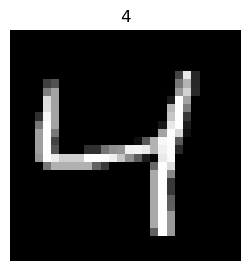

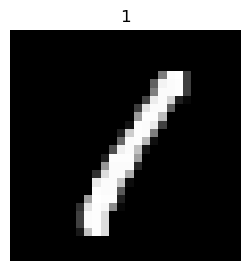

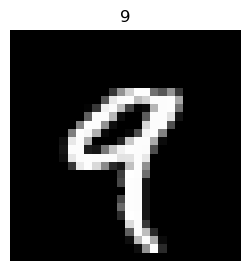

In [23]:
import matplotlib.pyplot as plt

for i in range(5):
    img = train_data[i][0]
    print(img.shape)
    img_squeeze = img.squeeze()
    print(img_squeeze.shape)
    label = train_data[i][1]
    plt.figure(figsize=(3, 3))
    plt.imshow(img_squeeze, cmap="gray")
    plt.title(label)
    plt.axis(False)

In [24]:
# Create train dataloader
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True) # when training, shuffling is useful since we do not want the model to learn order

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False) # when testing, its best to main order

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x17a8a7110>,
 <torch.utils.data.dataloader.DataLoader at 0x17d86ed50>)

In [25]:
for sample in next(iter(train_dataloader)):
    print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [34]:
from torch import nn
class MNIST_model(torch.nn.Module):
    """Model capable of predicting on MNIST dataset"""

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f"Output shape of conv block 1: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape of conv block 2: {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape of conv block 3: {x.shape}")
        return x

        

In [35]:
model = MNIST_model(input_shape=1,
                    hidden_units=10,
                    output_shape=10).to(device)

model

MNIST_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [36]:
model.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[-0.2142, -0.1754,  0.2371],
                        [-0.0514, -0.1664, -0.2345],
                        [ 0.1768, -0.3068, -0.0974]]],
              
              
                      [[[ 0.2027,  0.2915, -0.0609],
                        [ 0.0801, -0.1590, -0.2449],
                        [-0.0757,  0.2932,  0.3128]]],
              
              
                      [[[ 0.1213,  0.0221, -0.3263],
                        [-0.0601,  0.1098, -0.1300],
                        [ 0.3074,  0.0831, -0.0010]]],
              
              
                      [[[-0.0760, -0.0043, -0.3297],
                        [ 0.0890,  0.1343, -0.1199],
                        [ 0.2818,  0.3096,  0.0642]]],
              
              
                      [[[-0.0330, -0.0423, -0.3186],
                        [ 0.1349,  0.1438,  0.0390],
                        [ 0.2651,  0.0108,  0.2156]]],
              
              
      

In [37]:
dummy_x = torch.rand(size=(1, 28, 28)).unsqueeze(dim=0).to(device)
model(dummy_x)

tensor([[ 0.0530,  0.0045,  0.0466,  0.0524,  0.0416,  0.1398, -0.1892, -0.0342,
          0.0690,  0.1295]], grad_fn=<AddmmBackward0>)

In [38]:
dummy_x.shape

torch.Size([1, 1, 28, 28])

In [39]:
flatten_layer = nn.Flatten()
flatten_layer(dummy_x).shape

torch.Size([1, 784])

In [44]:
%%time
from tqdm.auto import tqdm


# Train on CPU unless GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"

model_cpu = MNIST_model(input_shape=1,
                        hidden_units=10,
                        output_shape=10).to(device)

# Create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cpu.parameters(), lr=0.1)

# Training loop
epochs = 5
for epoch in tqdm(range(epochs)):

    train_loss = 0

    for batch, (X, y) in enumerate(train_dataloader):

        model_cpu.train()
        X, y = X.to(device), y.to(device)

        # Forward pass 
        y_pred = model_cpu(X)

        # Loss calculation
        loss = loss_fn(y_pred, y)
        train_loss += loss

        # Optimizer zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Step the optimizer
        optimizer.step()

    # Adjust train loss for number of batches
    train_loss /= len(train_dataloader)

    # Testing loop
    test_loss_total = 0

    # Put the model in eval mode
    model_cpu.eval()

    # Turn on inference mode
    with torch.inference_mode():
        for batch, (X_test, y_test) in enumerate(test_dataloader):
            # Make sure test data on CPU
            X_test, y_test = X_test.to(device), y_test.to(device)
            test_pred = model_cpu(X_test)
            test_loss = loss_fn(test_pred, y_test)

            test_loss_total += test_loss
        
        test_loss_total /= len(test_dataloader)
    
    print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")


        

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.230 | Test loss: 0.063
Epoch: 1 | Loss: 0.075 | Test loss: 0.056
Epoch: 2 | Loss: 0.059 | Test loss: 0.051
Epoch: 3 | Loss: 0.050 | Test loss: 0.042
Epoch: 4 | Loss: 0.044 | Test loss: 0.043
CPU times: user 3min 11s, sys: 2min 18s, total: 5min 30s
Wall time: 3min 18s


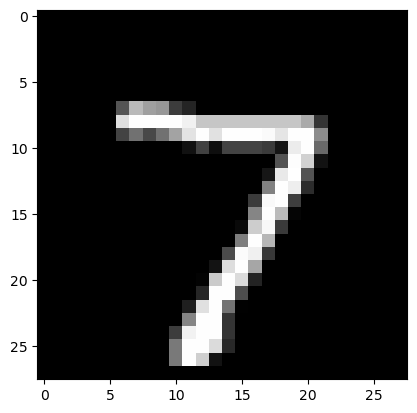

In [43]:
plt.imshow(test_data[0][0].squeeze(), cmap="gray")

In [47]:
# Logits -> prediction probabilities -> prediction labels
model_pred_logits = model_cpu(img.unsqueeze(dim=0).to(device))
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = torch.argmax(model_pred_probs, dim=1)
model_pred_label

tensor([9])

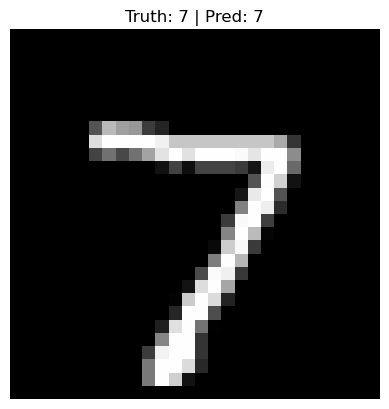

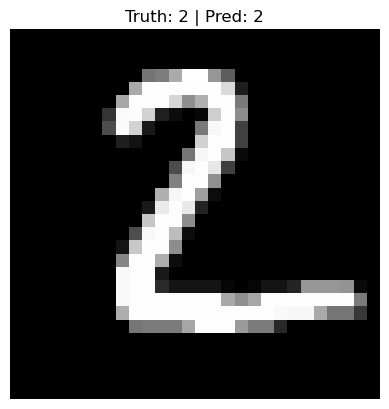

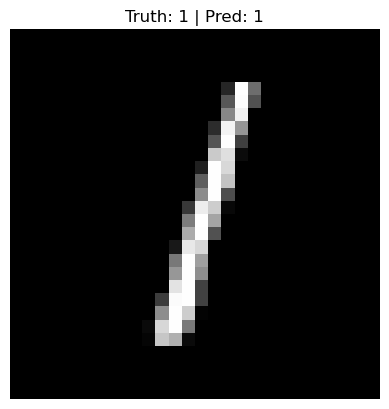

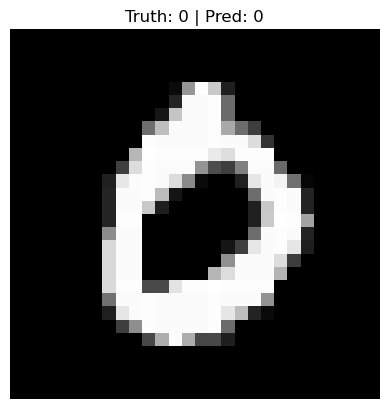

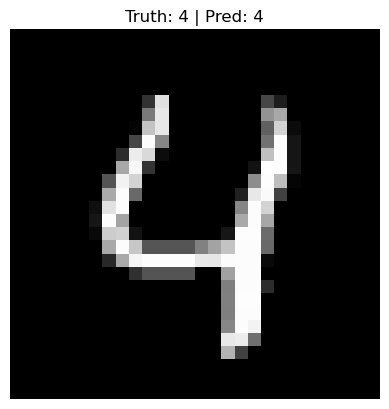

In [48]:
num_to_plot = 5
for i in range(num_to_plot):
    # Get image and labels from the test data
    img = test_data[i][0]
    label = test_data[i][1]

    # Make prediction
    model_pred_logits = model_cpu(img.unsqueeze(dim=0).to(device))
    model_pred_probs = torch.softmax(model_pred_logits, dim=1)
    model_pred_label = torch.argmax(model_pred_probs, dim=1)

    # Plotting
    plt.figure()
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}")
    plt.axis(False)

In [49]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split("."[1] >= 19)), "mlxtend version should be 0.19 or higher"
except:
    !pip install torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxetnd version: {mlxtend.__version__}")

mlxtend version: 0.23.1
  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/03/96/274a769f29be5adfee600edb97b97cc7817a86903f2477f8ca9c60445bc3/mlxtend-0.23.2-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn>=1.3.1 from https://files.pythonhosted.org/packages/cd/7a/19fe32c810c5ceddafcfda16276d98df299c8649e24e84d4f00df4a91e01/scikit_learn-1.5.2-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.9 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 3.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully u

In [50]:
# Predictions across all test data
from tqdm.auto import tqdm
model_cpu.eval()
y_preds = []

with torch.inference_mode():
    for batch, (X, y) in tqdm(enumerate(test_dataloader)):
        X, y = X.to(device), y.to(device)

        # Forward pass (raw output)
        y_pred_logits = model_cpu(X)
        # Logits -> Prediction probabilities -> Prediction labels
        y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
        
        y_preds.append(y_pred_labels)
    y_preds = torch.cat(y_preds).cpu()
len(y_preds)


0it [00:00, ?it/s]

10000

In [51]:
test_data.targets[:10], y_preds[:10]

(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

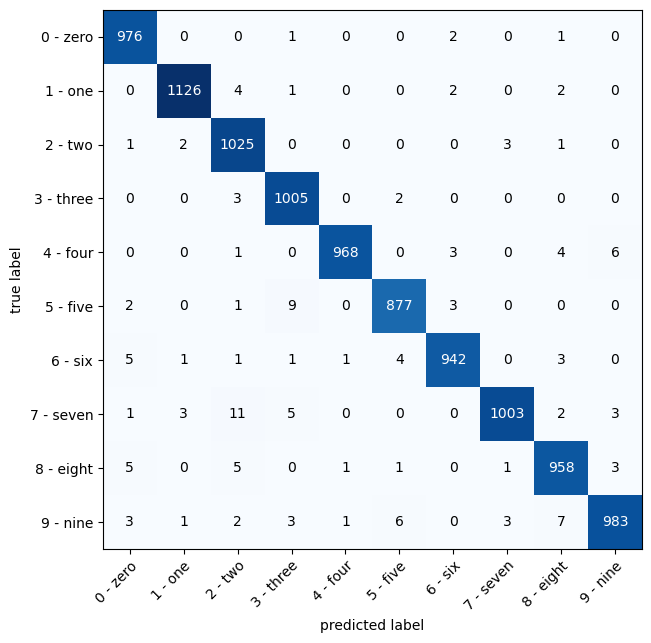

In [52]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds,
                         target=test_data.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)